<a href="https://colab.research.google.com/github/diaboloshogunate/GoogleColabML/blob/main/CIFAR-10-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import itertools
from keras.datasets import cifar10
from keras.models import Sequential
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import pandas as pd

170508288/170498071 [==============================] - 3s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


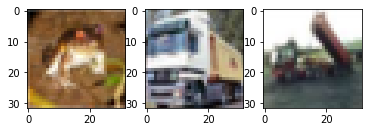

In [2]:
# load data
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainY = to_categorical(trainY)
testY = to_categorical(testY)
trainNormX = trainX.astype('float32')
testNormX = testX.astype('float32')
trainNormX = trainNormX / 255.0
testNormX = testNormX / 255.0
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
for i in range(3):
	pyplot.subplot(131 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

In [3]:
# define parameters
learningRates = [0.1,  0.01,  0.001]
activationMethods = ["sigmoid", "tanh"]
lossFunctions = ["mean_squared_error", "categorical_crossentropy"] # (3x2x2 = 12 combinations)
epochs = [50]
experiments = list(itertools.product(learningRates, activationMethods, lossFunctions, epochs))
experiments

[(0.1, 'sigmoid', 'mean_squared_error', 50),
 (0.1, 'sigmoid', 'categorical_crossentropy', 50),
 (0.1, 'tanh', 'mean_squared_error', 50),
 (0.1, 'tanh', 'categorical_crossentropy', 50),
 (0.01, 'sigmoid', 'mean_squared_error', 50),
 (0.01, 'sigmoid', 'categorical_crossentropy', 50),
 (0.01, 'tanh', 'mean_squared_error', 50),
 (0.01, 'tanh', 'categorical_crossentropy', 50),
 (0.001, 'sigmoid', 'mean_squared_error', 50),
 (0.001, 'sigmoid', 'categorical_crossentropy', 50),
 (0.001, 'tanh', 'mean_squared_error', 50),
 (0.001, 'tanh', 'categorical_crossentropy', 50)]

Experiment 1
Learning Rate: 0.1, Activation: sigmoid, Loss: mean_squared_error, Epochs: 50



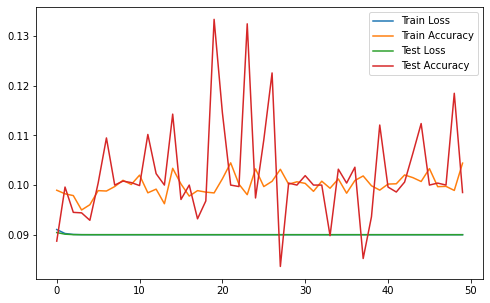

Experiment 2
Learning Rate: 0.1, Activation: sigmoid, Loss: categorical_crossentropy, Epochs: 50



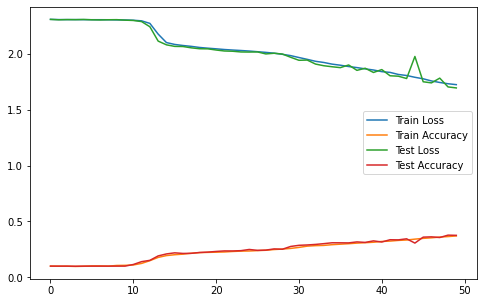

Experiment 3
Learning Rate: 0.1, Activation: tanh, Loss: mean_squared_error, Epochs: 50



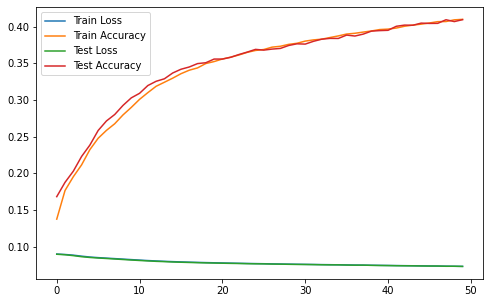

Experiment 4
Learning Rate: 0.1, Activation: tanh, Loss: categorical_crossentropy, Epochs: 50



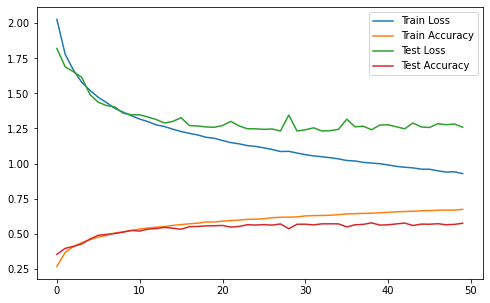

Experiment 5
Learning Rate: 0.01, Activation: sigmoid, Loss: mean_squared_error, Epochs: 50



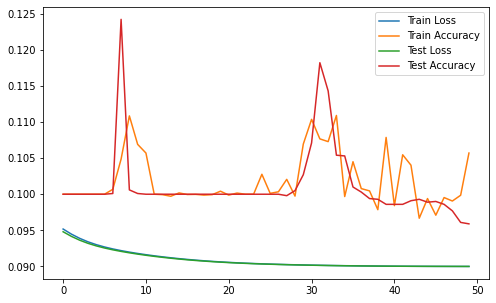

Experiment 6
Learning Rate: 0.01, Activation: sigmoid, Loss: categorical_crossentropy, Epochs: 50



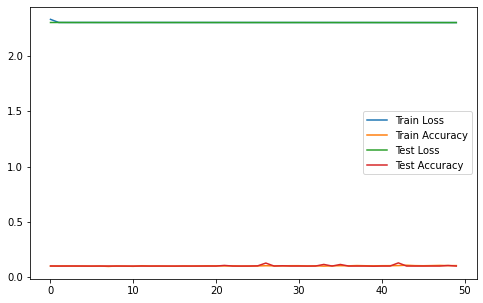

Experiment 7
Learning Rate: 0.01, Activation: tanh, Loss: mean_squared_error, Epochs: 50



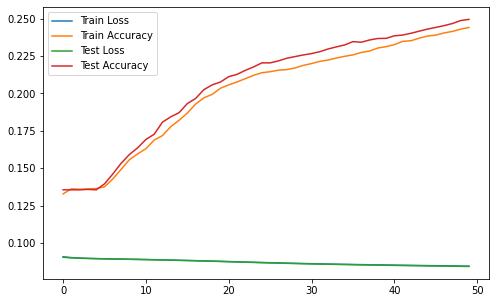

Experiment 8
Learning Rate: 0.01, Activation: tanh, Loss: categorical_crossentropy, Epochs: 50



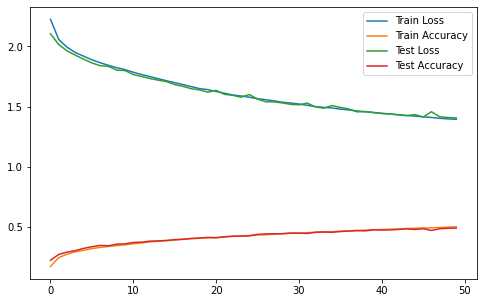

Experiment 9
Learning Rate: 0.001, Activation: sigmoid, Loss: mean_squared_error, Epochs: 50



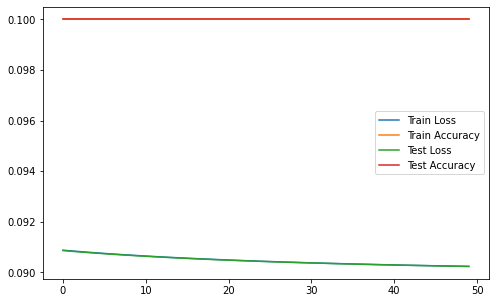

Experiment 10
Learning Rate: 0.001, Activation: sigmoid, Loss: categorical_crossentropy, Epochs: 50



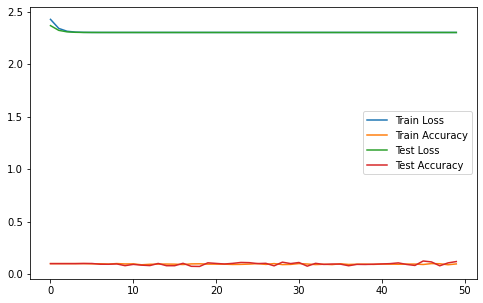

Experiment 11
Learning Rate: 0.001, Activation: tanh, Loss: mean_squared_error, Epochs: 50



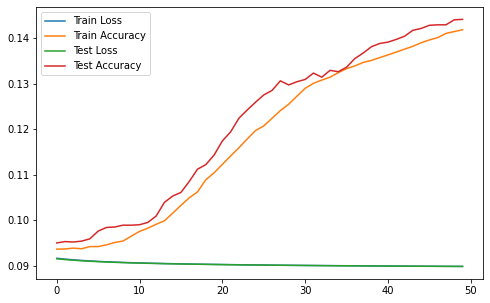

Experiment 12
Learning Rate: 0.001, Activation: tanh, Loss: categorical_crossentropy, Epochs: 50



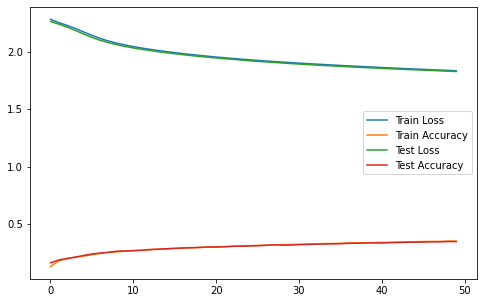

In [4]:
# experiment models
selectedModel = None
selectedModelLoss = None
for experiment, parameters in enumerate(experiments):
  learningRate, activation, loss, epochs = parameters

  # display info
  print(f"Experiment {experiment+1}")
  print(f"Learning Rate: {learningRate}, Activation: {activation}, Loss: {loss}, Epochs: {epochs}")
  print()
  
  # build model
  opt = SGD(learning_rate=learningRate, momentum=0)
  model = keras.Sequential()
  model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1,1), activation=activation, input_shape=(32,32,3)))
  model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2,2)))
  model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1,1), activation=activation))
  model.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(units=120, activation=activation))
  model.add(layers.Dense(units=84, activation=activation))
  model.add(layers.Dense(units=10, activation = 'softmax'))
  model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
  history = model.fit(x=trainNormX, y=trainY, epochs=epochs, batch_size=200, validation_data=(testNormX, testY), verbose=0);
  lossValue = history.history["loss"][-1]

  if(selectedModel == None or selectedModelLoss > lossValue): 
    selectedModel = model
    selectedModelLoss = lossValue
  
  # plot accuracy
  pd.DataFrame(history.history).plot(figsize=(8,5))
  pyplot.legend(["Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"])
  pyplot.show()

In [5]:
# show selected model
selectedModel.summary()
model = keras.models.Model(inputs=selectedModel.inputs, outputs=selectedModel.layers[2].output)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

Showing feature maps for test image 0


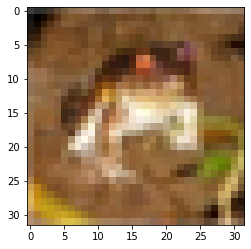

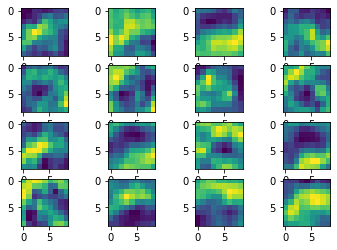


Showing feature maps for test image 1


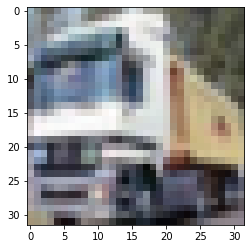

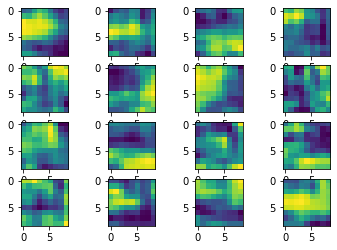


Showing feature maps for test image 2


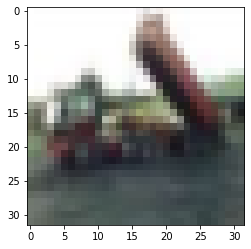

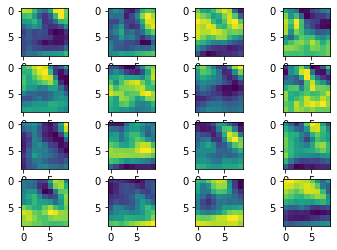


Showing feature maps for test image 3


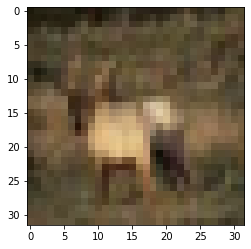

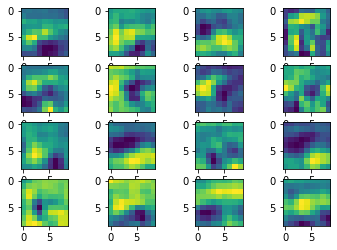


Showing feature maps for test image 4


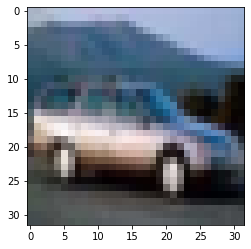

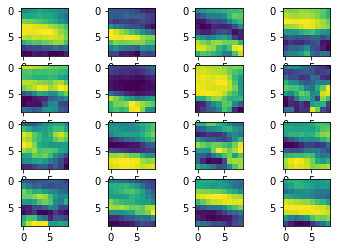


Showing feature maps for test image 5


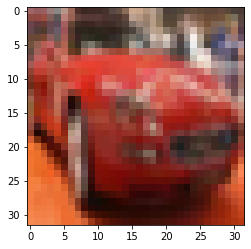

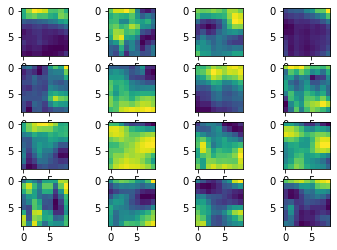


Showing feature maps for test image 6


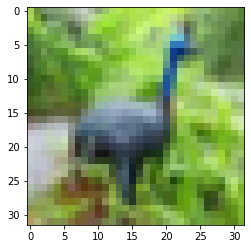

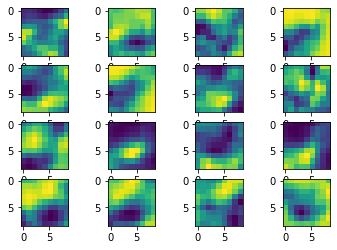


Showing feature maps for test image 7


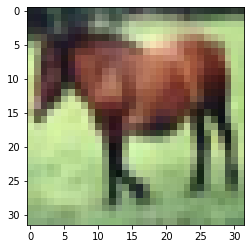

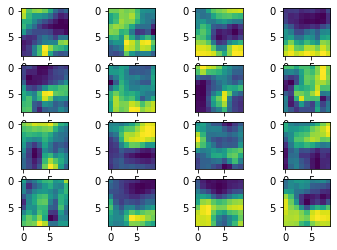


Showing feature maps for test image 8


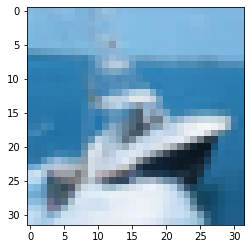

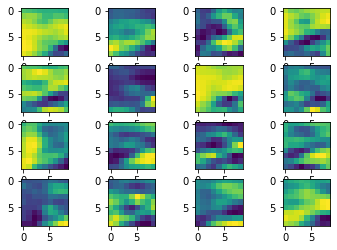


Showing feature maps for test image 9


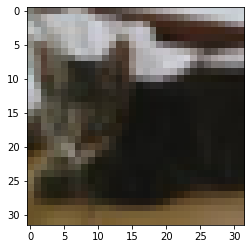

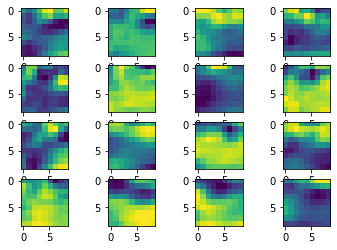

In [6]:
feature_maps = model.predict(trainNormX)
for i in range(10):
  print(f"Showing feature maps for test image {i}")
  pyplot.imshow(trainX[i])
  pyplot.show()
  print()
  for j in range(16):
    pyplot.subplot(4, 4, j+1)
    pyplot.imshow(feature_maps[i, :, :, j])
  pyplot.show()
  print()